# Subspace Digital Twin, Sanity Checking Run

*Danilo Lessa Bernardineli, November 2023*

On this notebook, we do an sanity checking run (which is a single run) so that basic metrics and KPIs
for the simulation are computed.

## Part 1. Dependences & Set-up

In [2]:
import sys
sys.path.append('../')
import pandas as pd
import hvplot.pandas
import holoviews as hv
hvplot.extension('plotly')

import plotly.io as pio
pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [3]:
# from subspace_model.experiment import standard_stochastic_run
# sim_df = sanity_check_run()

# Load simulation results from terminal ran experiment
sim_df = pd.read_pickle(
    "../data/simulations/sanity_check_run-2023-12-19_21-33-20.pkl.gz"
)

## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

In [86]:
# Ensure numeric types for plotly
for col in sim_df.columns:
    if "supply" in col or col == "sum_of_stocks":
        sim_df[col] = pd.to_numeric(sim_df[col], errors='coerce')

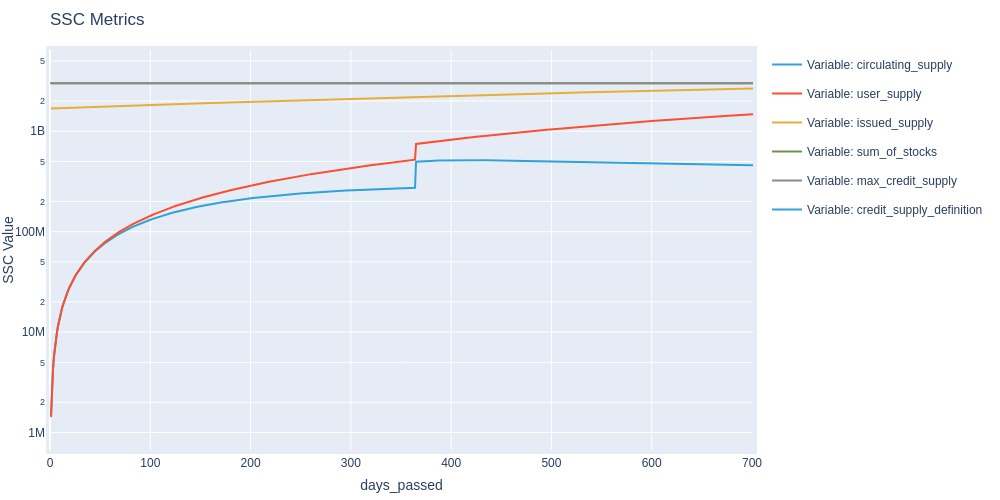

In [87]:
chart = sim_df.hvplot(
    x="days_passed", 
    y=[col for col in sim_df.columns if "supply" in col or col == "sum_of_stocks"], 
    title="SSC Metrics", logy=True, 
    ylabel="SSC Value", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

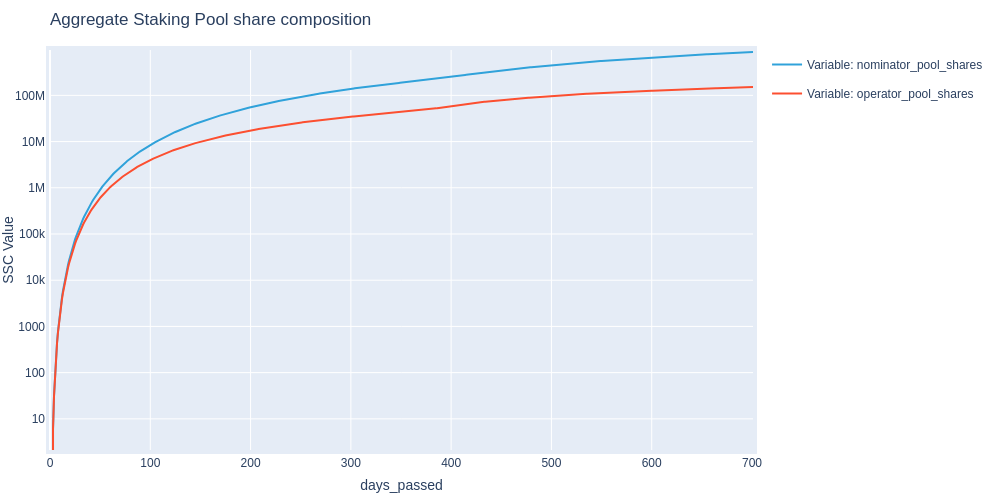

In [88]:
chart = sim_df.hvplot(
    x="days_passed", 
    y=[el for el in sim_df.columns if "shares" in el],
    title="Aggregate Staking Pool share composition", logy=True, 
    ylabel="SSC Value", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

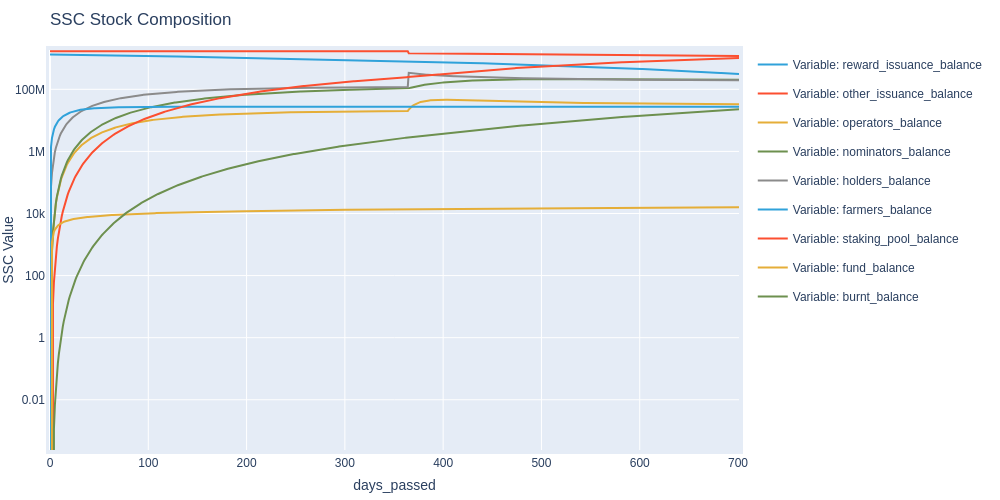

In [89]:
chart = sim_df.hvplot(
    x="days_passed", 
    y=[el for el in sim_df.columns if "_balance" in el],
    title="SSC Stock Composition", logy=True, 
    ylabel="SSC Value", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

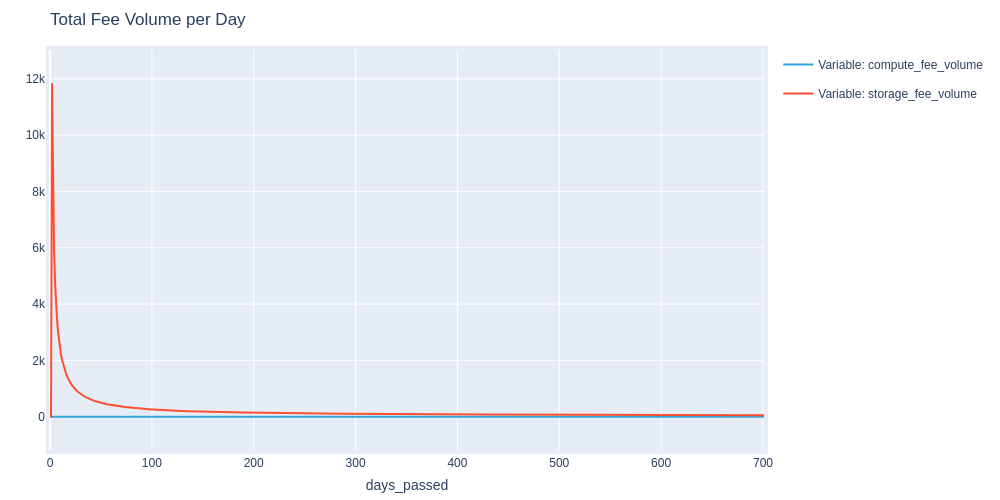

In [17]:
chart = sim_df.hvplot(
    x="days_passed", 
    y=[el for el in sim_df.columns if "volume" in el],
    title="Total Fee Volume per Day",# logy=True, 
    ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

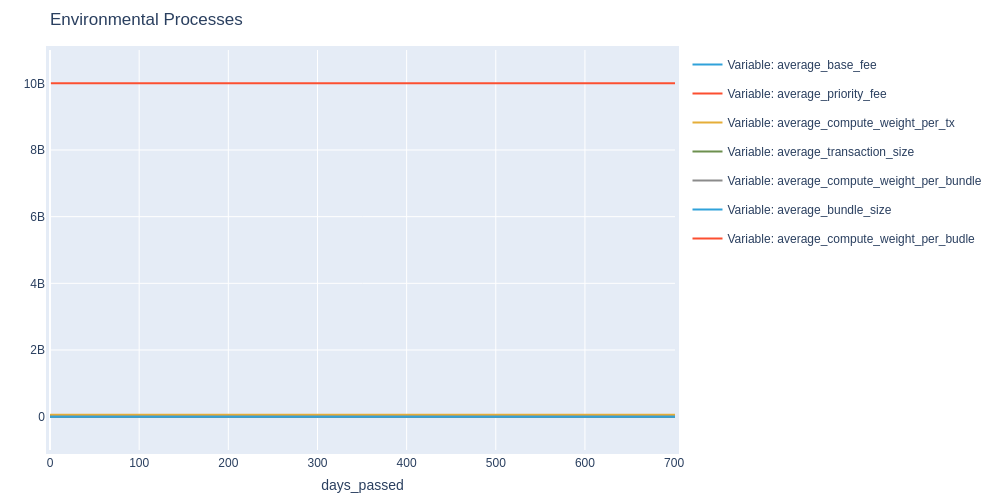

In [19]:
chart = sim_df.hvplot(
        x="days_passed", 
        y=[el for el in sim_df.columns if "average" in el],
        title="Environmental Processes", #logy=True, 
        ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

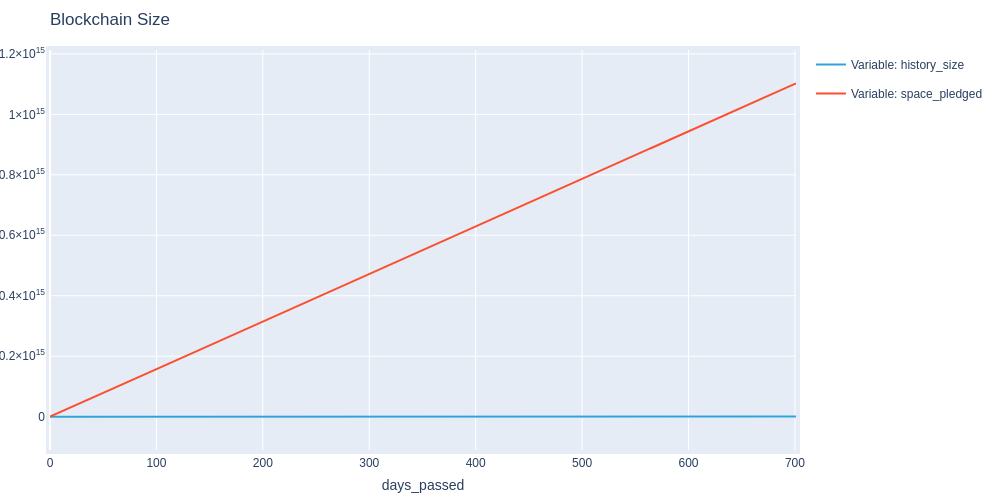

In [20]:
chart = sim_df.hvplot(
        x="days_passed", 
        y=['history_size', 'space_pledged'],
        title="Blockchain Size", #logy=True, 
        ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

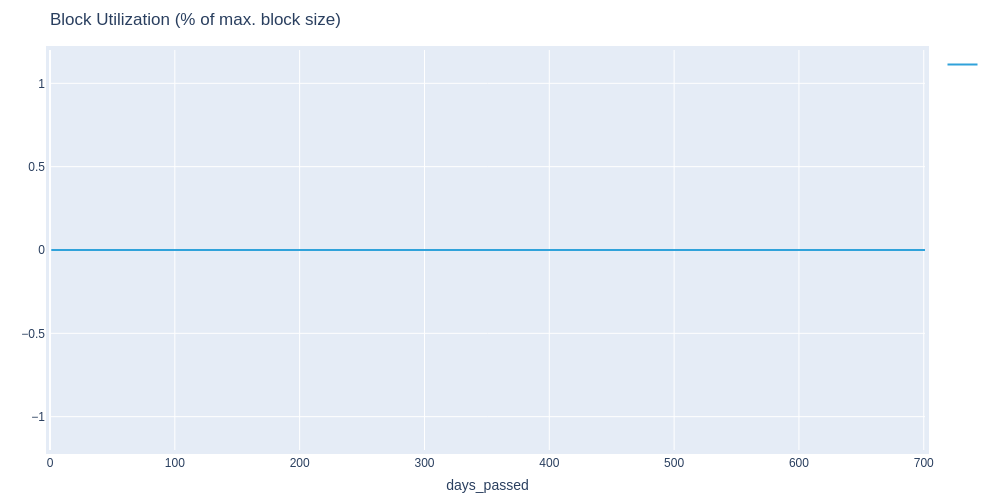

In [22]:
chart = sim_df.hvplot(
        x="days_passed", 
        y=['block_utilization'],
        title="Block Utilization (% of max. block size)", #logy=True, 
        ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

### Scoped KPIs

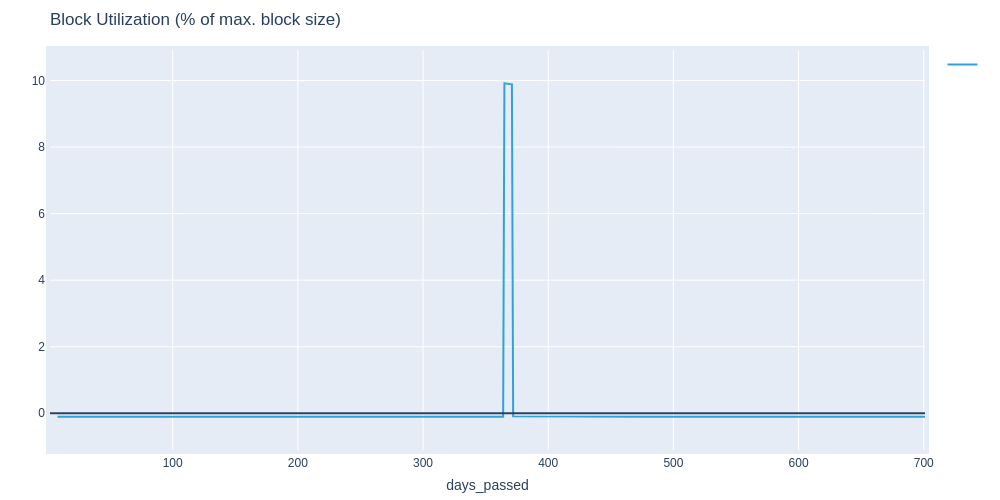

In [25]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.circulating_supply.diff()).reset_index()

chart = s.hvplot(
        x="days_passed", 
        y=['circulating_supply'],
        title="Block Utilization (% of max. block size)", #logy=True, 
        ylabel="", width=1000, height=500)

chart *= hv.HLine(0)

pio.show(hv.render(chart, backend='plotly'))

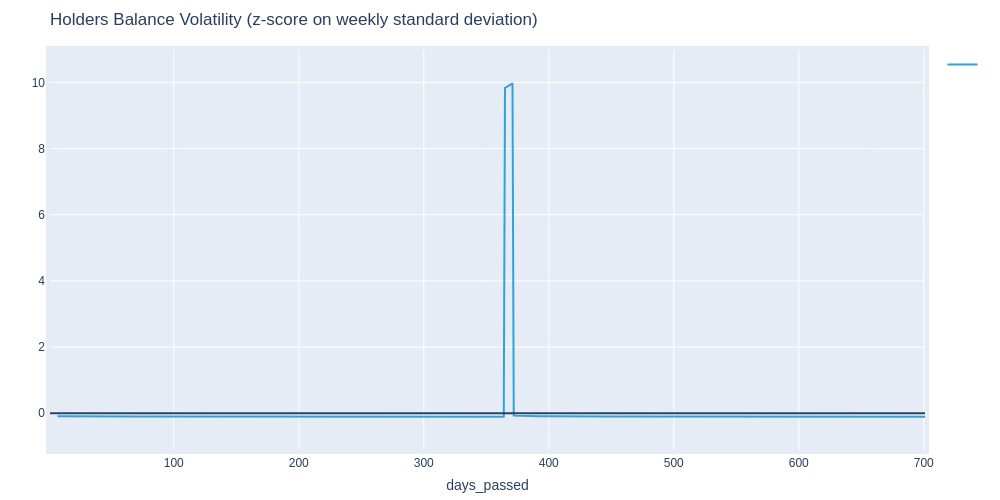

In [26]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.holders_balance.diff()).reset_index()
chart = s.hvplot(
        x="days_passed", 
        y=['holders_balance'],
        title="Holders Balance Volatility (z-score on weekly standard deviation)", #logy=True, 
        ylabel="", width=1000, height=500)

chart *= hv.HLine(0)

pio.show(hv.render(chart, backend='plotly'))

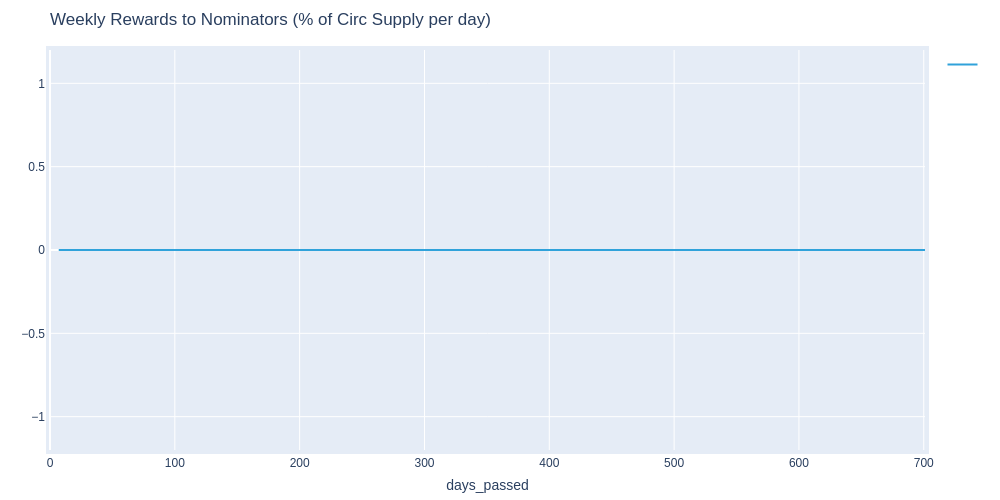

In [48]:
n_days = 7
fig_df = sim_df.set_index('days_passed')
s = fig_df.rewards_to_nominators.rolling(n_days).sum() / fig_df.circulating_supply.rolling(n_days).mean()

_df = pd.DataFrame({
    "days_passed": fig_df.index,
    "rewards_to_nominators": s.values
})
chart = _df.hvplot(
        x="days_passed", 
        y=['rewards_to_nominators'],
        title="Weekly Rewards to Nominators (% of Circ Supply per day)", #logy=True, 
        ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

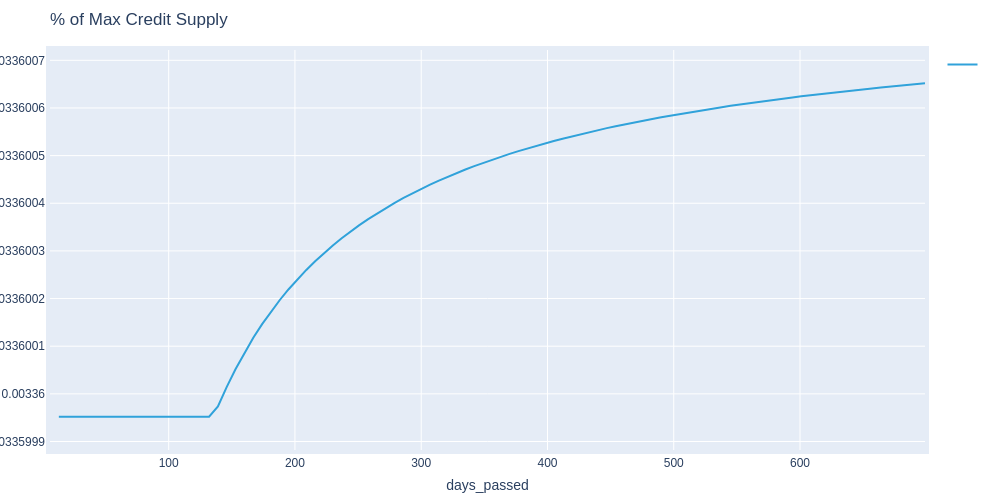

In [49]:
n = 7
s = fig_df.reward_issuance_balance.diff() * -1.0
s /= fig_df.max_credit_supply
s = s.rolling(n).sum()[n-1::n]
_df = pd.DataFrame({
    "days_passed": s.index,
    "reward_issuance_balance": s.values
})

chart = _df.hvplot(
        x="days_passed", 
        y=['reward_issuance_balance'],
        title="% of Max Credit Supply", #logy=True, 
        ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))

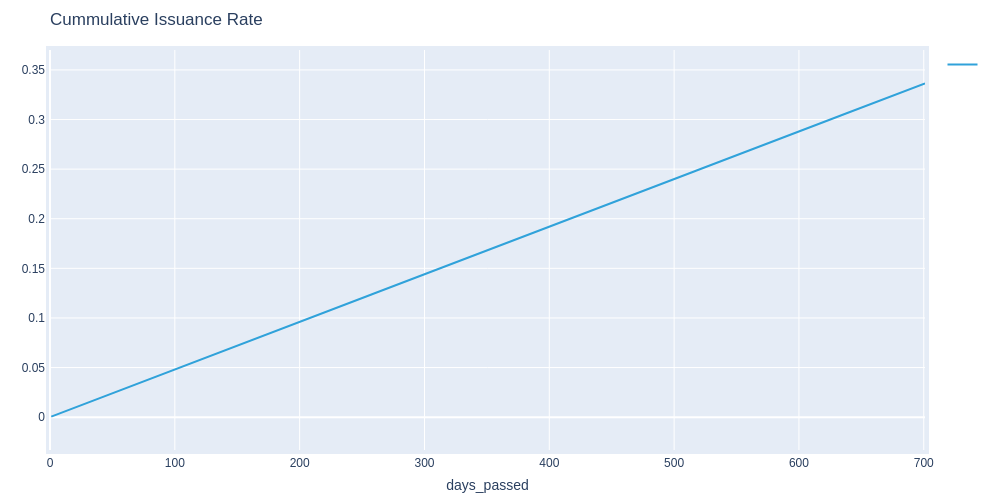

In [51]:
n = 7
s = fig_df.reward_issuance_balance.diff() * -1.0
s /= fig_df.max_credit_supply
s = s.cumsum()

_df = pd.DataFrame({
    "days_passed": s.index,
    "reward_issuance_balance": s.values
})

chart = _df.hvplot(
        x="days_passed", 
        y=['reward_issuance_balance'],
        title="Cummulative Issuance Rate", #logy=True, 
        ylabel="", width=1000, height=500)

pio.show(hv.render(chart, backend='plotly'))